In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../../new_data/Train/Profile/Profile.csv').drop(columns=['Unnamed: 0'])
df_gender_labeled = df.copy()
df_gender_labeled[['gender']] = df_gender_labeled[['gender']].replace([0.0, 1.0], ['male', 'female'])

In [3]:
print("Min age: {}".format(df['age'].min()))
print("Max age: {}".format(df['age'].max()))

Min age: 1.0
Max age: 112.0


# Data state

In [4]:
# Preview of the dataframe:
df

,userid,age,gender,ope,con,ext,agr,neu
0,7267f43c71fcf53f4580fd3cd808bd48,26.0,0.0,4.00,2.25,2.20,3.60,2.80
1,e1cdac10d136e76e064e4860007d786d,24.0,0.0,4.20,3.35,2.45,3.90,2.60
2,ea4b8b534a35f59713f61f29b8725d09,27.0,1.0,2.75,4.80,3.15,3.85,4.15
3,c7bb07b4b9ccd28cd0bc285194da5c72,29.0,1.0,3.40,3.20,2.10,3.70,2.35
4,e8b8f7f4f40ea6babfa9a2a967ff1866,25.0,0.0,4.40,3.25,4.00,2.89,2.35
...,...,...,...,...,...,...,...,...
9495,094f6c8f50a4783c2ad0ab18182d9e93,22.0,0.0,2.70,2.50,1.75,3.15,4.05
9496,027081c27fe42c0ea3dac23604bcda8f,14.0,1.0,3.85,1.65,2.50,3.15,4.45
9497,c6065e52c61187ed0db62ccee2654c6b,22.0,0.0,3.85,3.35,1.80,3.60,2.55
9498,01c02aada76eec7f7d7939eab1b91671,21.0,1.0,3.60,3.40,3.15,3.90,2.80


In [5]:
# The datatypes are ok:
df.dtypes

userid     object
age       float64
gender    float64
ope       float64
con       float64
ext       float64
agr       float64
neu       float64
dtype: object

In [6]:
# There is no missing data in Profile.csv:
df.isna().sum()

userid    0
age       0
gender    0
ope       0
con       0
ext       0
agr       0
neu       0
dtype: int64

# Data visualization

## Bar plots

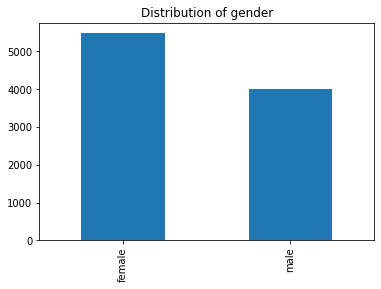

In [22]:
df_gender_labeled['gender'].value_counts().plot(
    kind='bar',
    title='Distribution of gender'
)

In [8]:
def categorize_age(age: str) -> str:
    age = float(age)
    if 0 <= age <= 24:
        return "xx-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 49:
        return "35-49"
    else:
        return "50-xx"

df_gender_labeled = df_gender_labeled.assign(
    age_labeled=pd.Series([categorize_age(age) for age in df['age']])
)

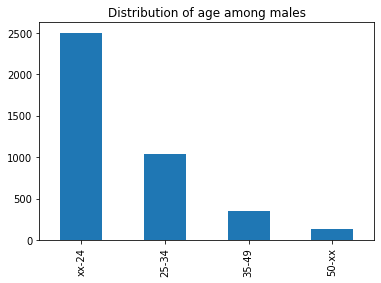

In [9]:
df_gender_labeled[df_gender_labeled['gender'] == 'male']['age_labeled'].value_counts().plot(
    kind='bar',
    title='Distribution of age among males'
)

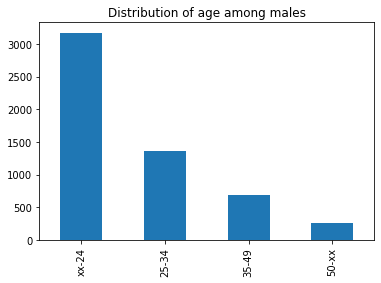

In [10]:
df_gender_labeled[df_gender_labeled['gender'] == 'female']['age_labeled'].value_counts().plot(
    kind='bar',
    title='Distribution of age among males'
)

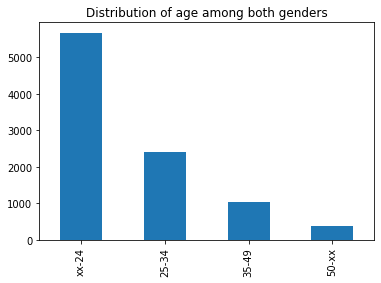

In [20]:
df_gender_labeled['age_labeled'].value_counts().plot(
    kind='bar',
    title='Distribution of age among both genders'
)

Observation: Both genders have a skewed distribution. We might want to use log scales instead to unskew it a bit. However, the following method gives the same results. Maybe I am missing something

In [11]:
def categorize_log_age(age: str) -> str:
    log_age = np.log(float(age))
    if log_age <= np.log(24):
        return "xx-log(24)"
    elif np.log(25) <= log_age <= np.log(34):
        return "log(25)-log(34)"
    elif np.log(35) <= log_age <= np.log(49):
        return "log(35)-log(49)"
    else:
        return "log(50)-xx"

df_gender_labeled = df_gender_labeled.assign(
    log_age_labeled=pd.Series([categorize_log_age(age) for age in df['age']])
)

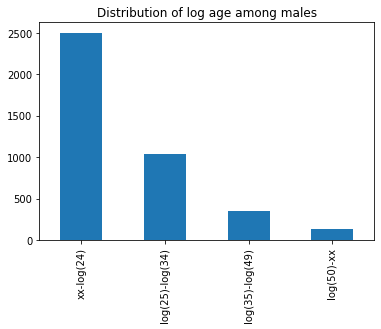

In [12]:
df_gender_labeled[df_gender_labeled['gender'] == 'male']['log_age_labeled'].value_counts().plot(
    kind='bar',
    title='Distribution of log age among males'
)

## Violin plots

Text(0.5, 1.0, 'Violin plot of males')

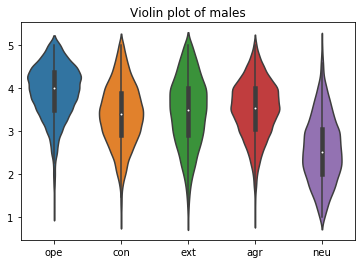

In [13]:
sns.violinplot(
    data=df[df['gender'] == 0.0].iloc[:, 3:]
).set_title('Violin plot of males')

Text(0.5, 1.0, 'Violin plot of females')

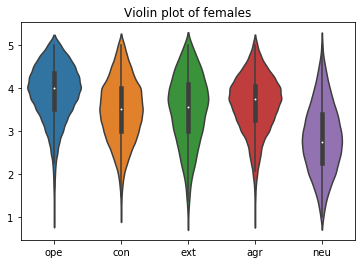

In [14]:
sns.violinplot(
    data=df[df['gender'] == 1.0].iloc[:, 3:]
).set_title('Violin plot of females')

Text(0.5, 1.0, 'Violin plot of both genders')

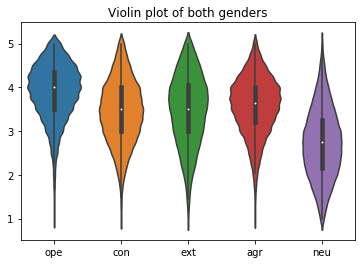

In [19]:
sns.violinplot(
    data=df.iloc[:, 3:]
).set_title('Violin plot of both genders')

## Pair plots

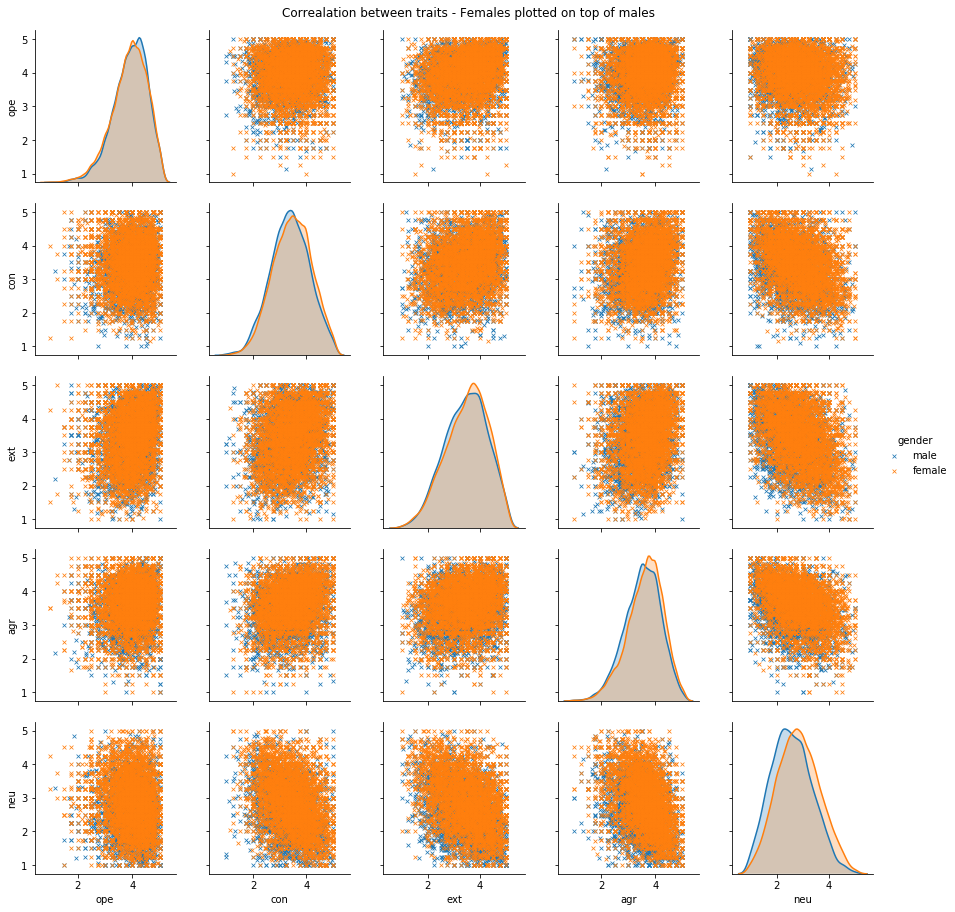

In [15]:
sns.pairplot(
    df_gender_labeled.iloc[:, 2:],
    hue='gender',
    hue_order=['male', 'female'],
    markers=['x', 'x'],
    plot_kws={"s": 15}
).fig.suptitle("Correalation between traits - Females plotted on top of males", y=1.01)
plt.show()

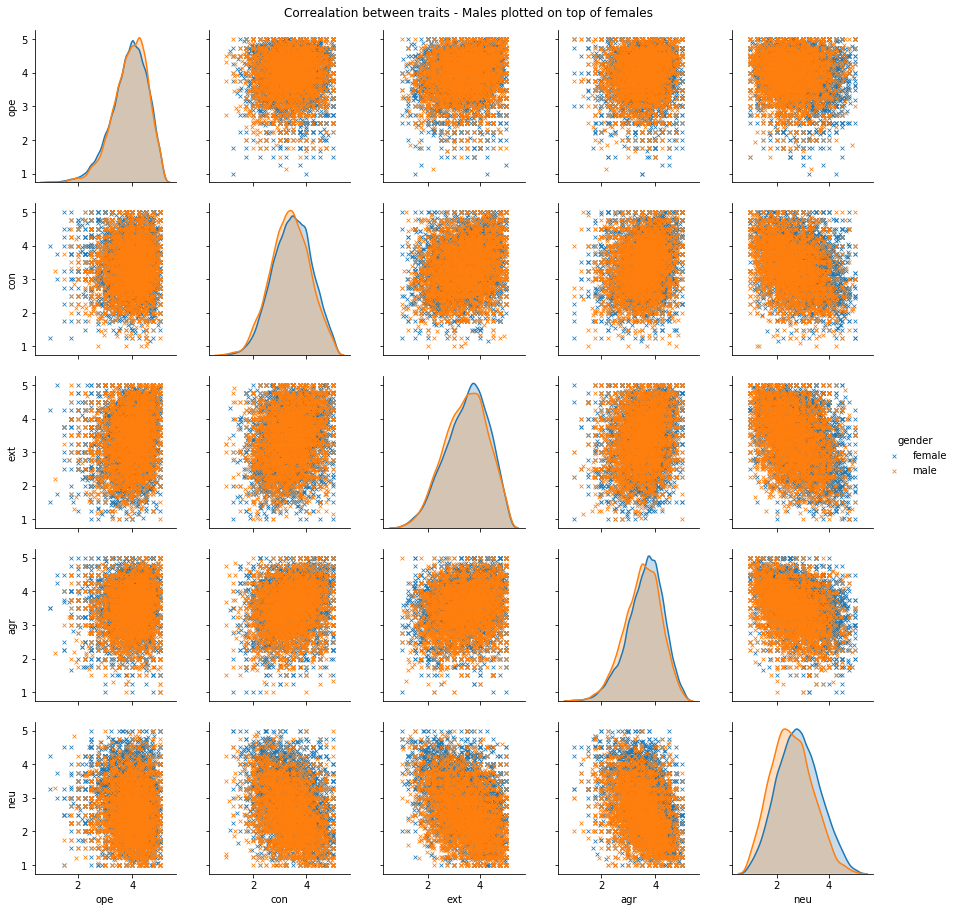

In [16]:
sns.pairplot(
    df_gender_labeled.iloc[:, 2:],
    hue='gender',
    hue_order=['female', 'male'],
    markers=['x', 'x'],
    plot_kws={"s": 15}
).fig.suptitle("Correalation between traits - Males plotted on top of females", y=1.01)
plt.show()

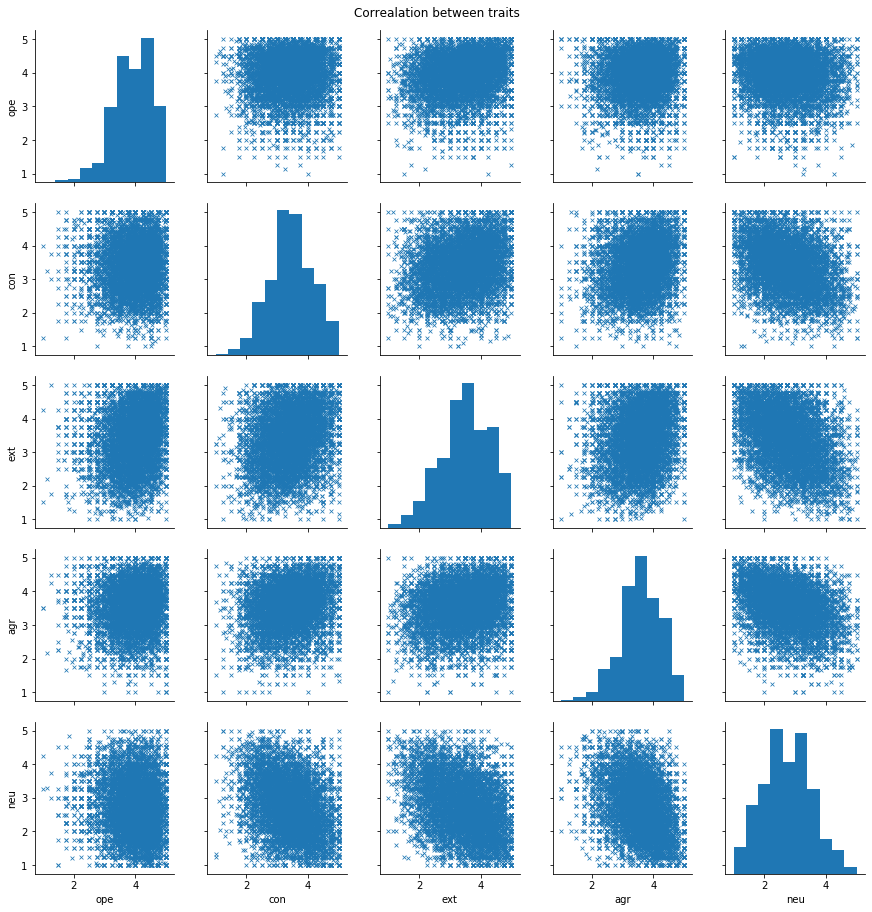

In [17]:
sns.pairplot(
    df_gender_labeled.iloc[:, 2:],
    markers=['x'],
    plot_kws={"s": 15}
).fig.suptitle("Correalation between traits", y=1.01)
plt.show()